In [1]:
library("Seurat")
library("tidyverse")
library("cowplot")
library("patchwork")

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
library(ggalluvial)
library(dplyr)

In [3]:
library('ggplot2')

In [4]:
Cere_GABA <- readRDS('/data/work/5months_Cere/GABA/10_Cere_GABA_unannotation.rds')
Cere_GABA

An object of class Seurat 
18448 features across 3374 samples within 2 assays 
Active assay: RNA (16448 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [5]:
Cere_GABA

An object of class Seurat 
18448 features across 3374 samples within 2 assays 
Active assay: RNA (16448 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [6]:
Idents(Cere_GABA) <- Cere_GABA$`Sample_ID`

In [7]:
# Data preprocessing and dimensionality reduction
budgerigar_brain_obj_list <- SplitObject(Cere_GABA, split.by = "Sample_ID")

# NormalizeData
for (name in names(budgerigar_brain_obj_list)) {
   
    budgerigar_brain_obj_list[[name]] <- NormalizeData(budgerigar_brain_obj_list[[name]], normalization.method = "LogNormalize", assay = "RNA")

    budgerigar_brain_obj_list[[name]] <- FindVariableFeatures(budgerigar_brain_obj_list[[name]], assay = "RNA", nfeatures = 2000, selection.method = "vst")
}

Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”


In [8]:
integrated_features <- SelectIntegrationFeatures(object.list = budgerigar_brain_obj_list)

budgerigar_brain_obj_list <- lapply(X = budgerigar_brain_obj_list, FUN = function(x) {
    x <- ScaleData(x, features = integrated_features, verbose = FALSE)
    x <- RunPCA(x, features = integrated_features, verbose = FALSE)
})


In [9]:
####rpca
anchors <- FindIntegrationAnchors(object.list = budgerigar_brain_obj_list, anchor.features = integrated_features, reduction = "rpca",k.anchor = 20)

Cere_GABA <- IntegrateData(anchorset = anchors, normalization.method = "LogNormalize")

Scaling features for provided objects

Computing within dataset neighborhoods

Finding all pairwise anchors

Warning message:
“`invoke()` is deprecated as of rlang 0.4.0.
Please use `exec()` or `inject()` instead.
This warning is displayed once every 8 hours.”
Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 961 anchors

Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 952 anchors

Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new data

In [10]:
# Scale data (default: only for variable features)
variable_feature <- rownames(Cere_GABA)

In [11]:
Cere_GABA <- ScaleData(Cere_GABA, features = variable_feature, vars.to.regress = c("nCount_RNA"))

Regressing out nCount_RNA

Centering and scaling data matrix



In [12]:
options(repr.plot.width = 9, repr.plot.height = 9)
DefaultAssay(Cere_GABA) <- "integrated"

# PCA

Cere_GABA <- RunPCA(Cere_GABA, assay = "integrated", verbose = T) 

PC_ 1 
Positive:  ARHGEF33, PPP1R17, CALB1, GAS2, CA8, ENSMUNG00000001920, ENSMUNG00000001918, DGKH, INPP5A, FSTL4 
	   ENSMUNG00000004189, ENSMUNG00000012767, ENSMUNG00000016652, PTPN3, RGS3, ITPR1, ARHGAP20, ENSMUNG00000016230, GRAMD2B, PDE5A 
	   ENSMUNG00000013888, SYNJ2, DGKI, KSR1, FHL2, SVIL, ENSMUNG00000001384, ENSMUNG00000005607, ENSMUNG00000007585, FOXP4 
Negative:  PTPRK, PCDH7, ADCY2, CRACD, CNTN6, SGCZ, RERG, CDH12, NLGN1, ENSMUNG00000010577 
	   CXCL14, CCDC148, ADGRL3, NFIB, ENSMUNG00000015926, SLC24A2, ENSMUNG00000004788, NKAIN2, NELL2, MAGI1 
	   MAP1B, ABI3BP, DGKB, CIT, ASPG, CHD7, TMEM178B, ZFPM2, SULF1, TLL1 
PC_ 2 
Positive:  SULF1, CXCL14, MMEL1, CHL1, CACNA1B, ARHGAP6, POU6F2, CACNA2D3, PAX2, KL 
	   CDH13, RASSF6, ENSMUNG00000010577, NAV3, CHD7, PDGFD, DOC2B, GPLD1, KIAA1217, KCNC2 
	   PLCL2, MARCHF1, C8orf34, GRIN3A, LSP1, PDE9A, DAB1, TOPAZ1, NRG1, SYT1 
Negative:  PTPRZ1, PVALB, LAMA2, ENSMUNG00000008602, SPHKAP, GRM1, CNTN6, SLC24A2, GABBR2, LRP1B 
	   UTR

In [13]:
Cere_GABA <- FindNeighbors(Cere_GABA, dims = 1:40, reduction = "pca")

Computing nearest neighbor graph

Computing SNN



Loading required package: ggraph


Attaching package: ‘ggraph’


The following object is masked from ‘package:sp’:

    geometry


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:02:11 UMAP embedding parameters a = 0.9922 b = 1.112

09:02:11 Read 3374 rows and found 40 numeric columns

09:02:11 Using Annoy for neighbor search, n_neighbors = 30

09:02:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:02:11 Writing NN index file to temp file /tmp/Rtmp4iDhKY/file5fa3b186ed9

09:02:11 Searching Annoy index using 1 thread, search_k =

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9280
Number of communities: 4
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8949
Number of communities: 7
Elapsed time: 0 seconds


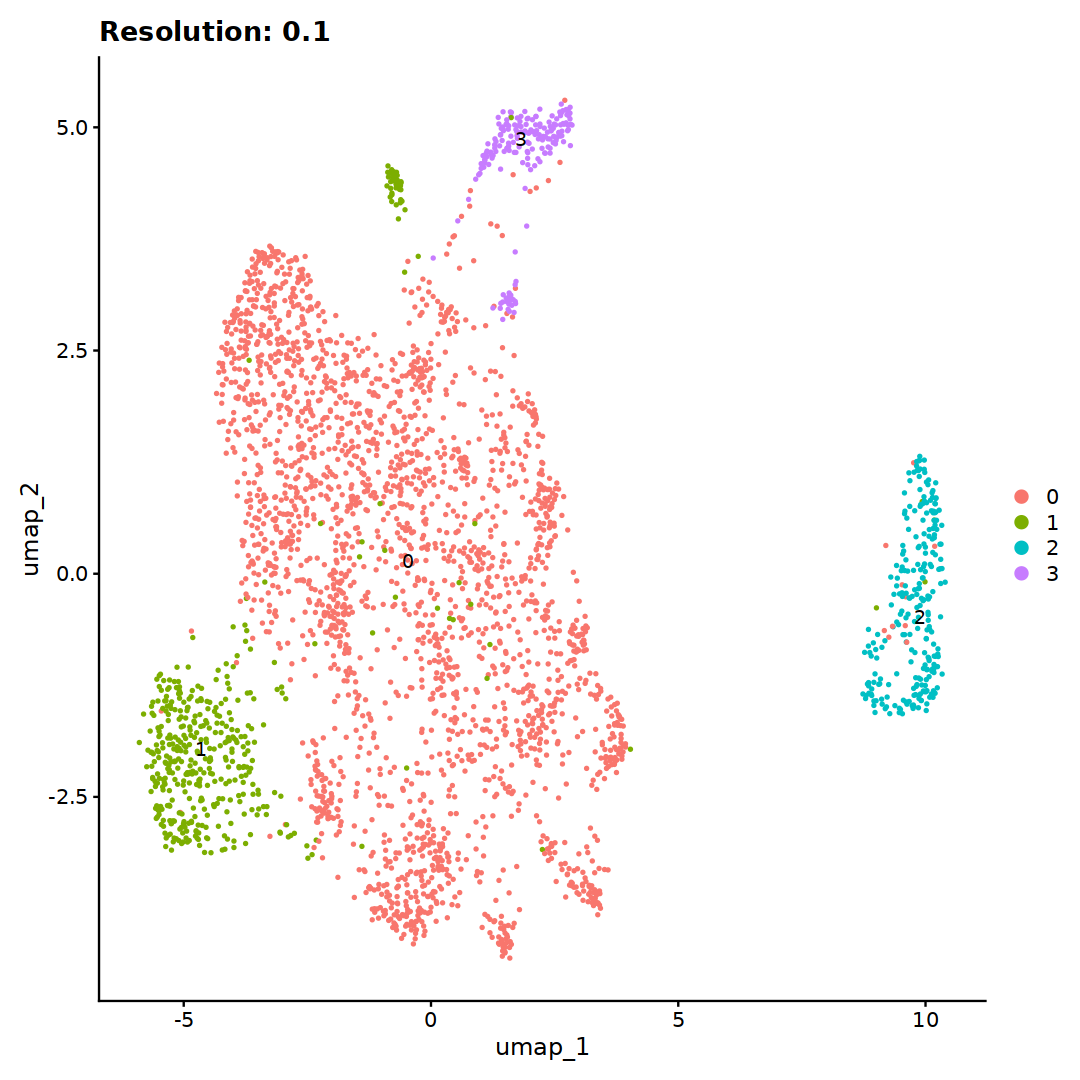

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8710
Number of communities: 8
Elapsed time: 0 seconds


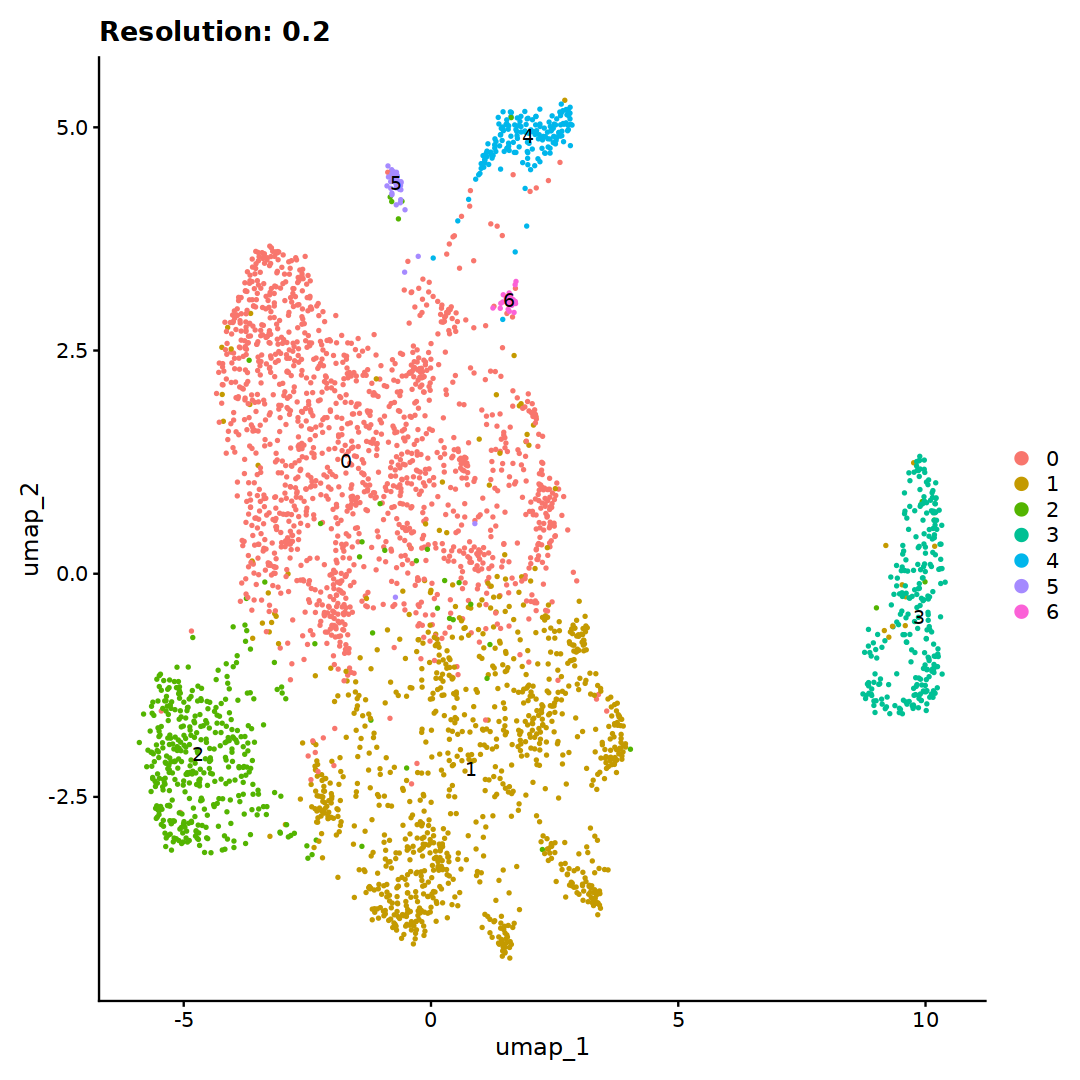

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8502
Number of communities: 10
Elapsed time: 0 seconds


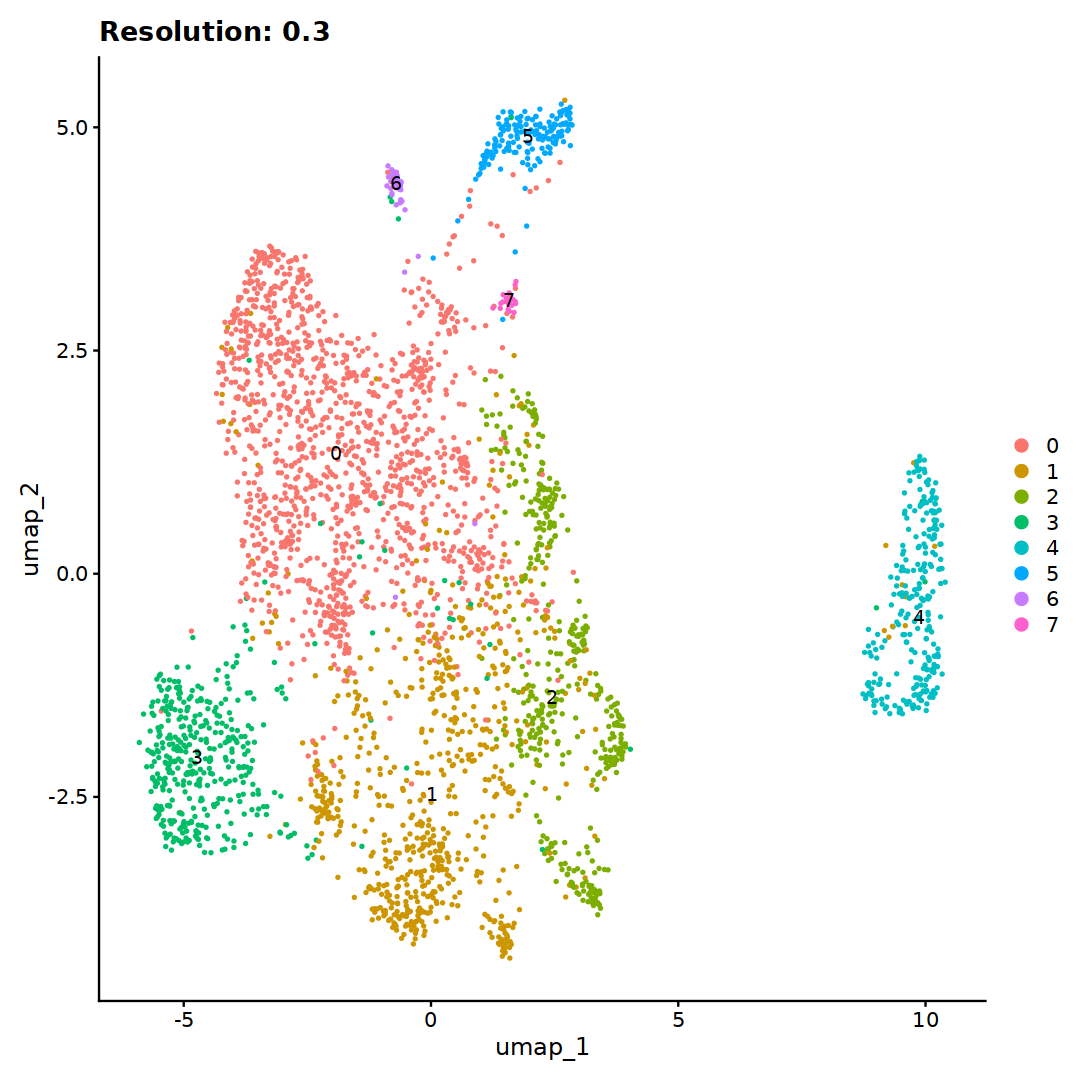

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8338
Number of communities: 10
Elapsed time: 0 seconds


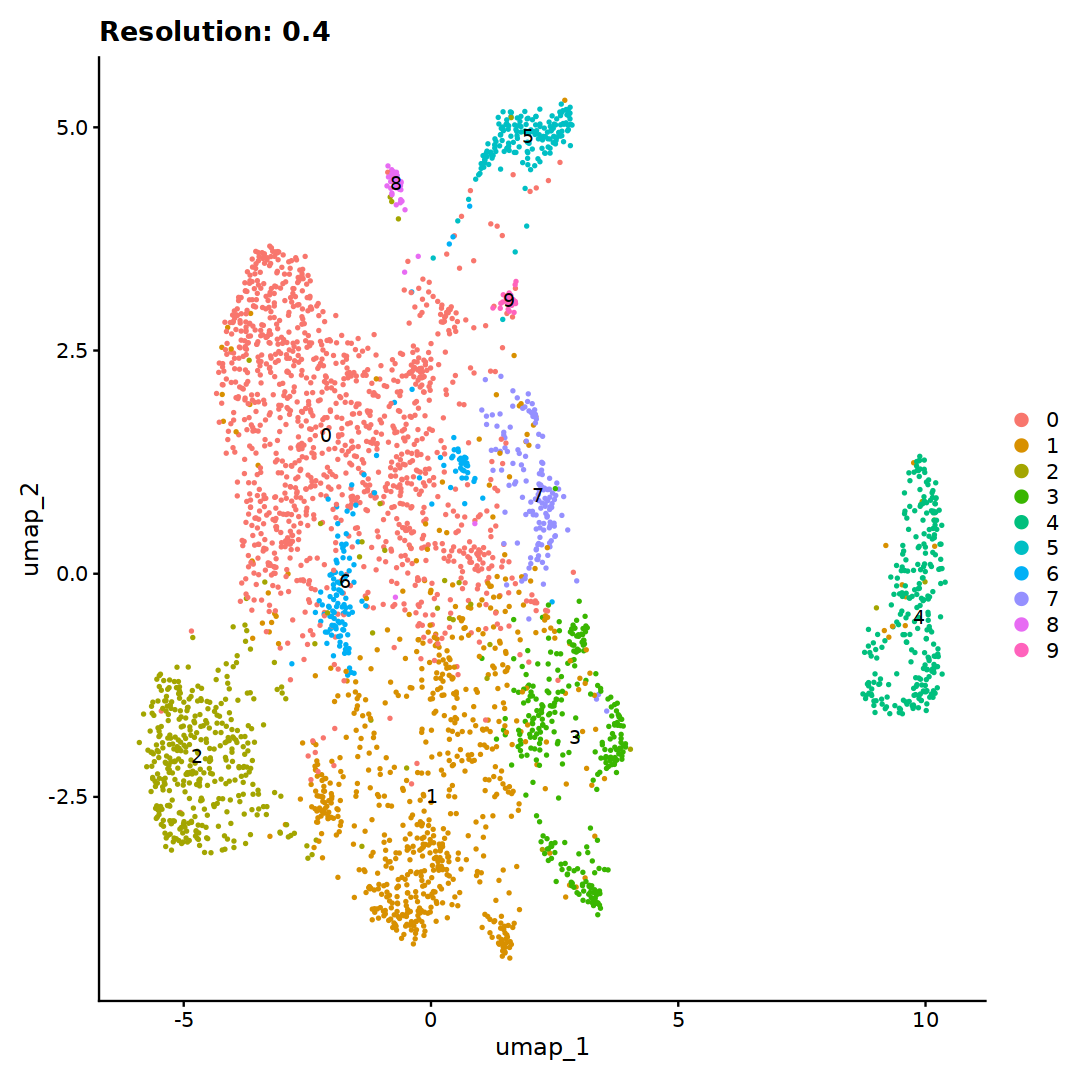

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8188
Number of communities: 12
Elapsed time: 0 seconds


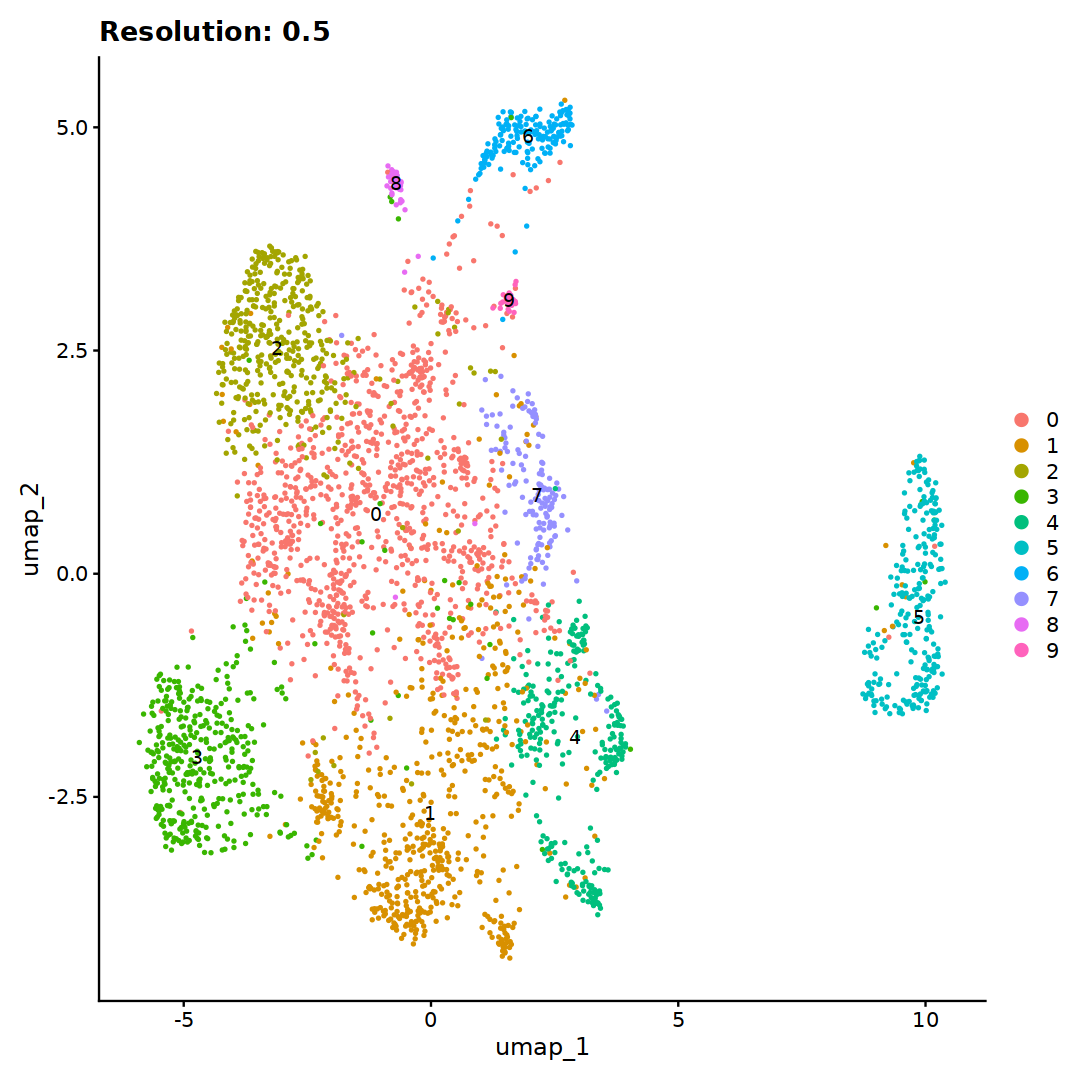

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8048
Number of communities: 13
Elapsed time: 0 seconds


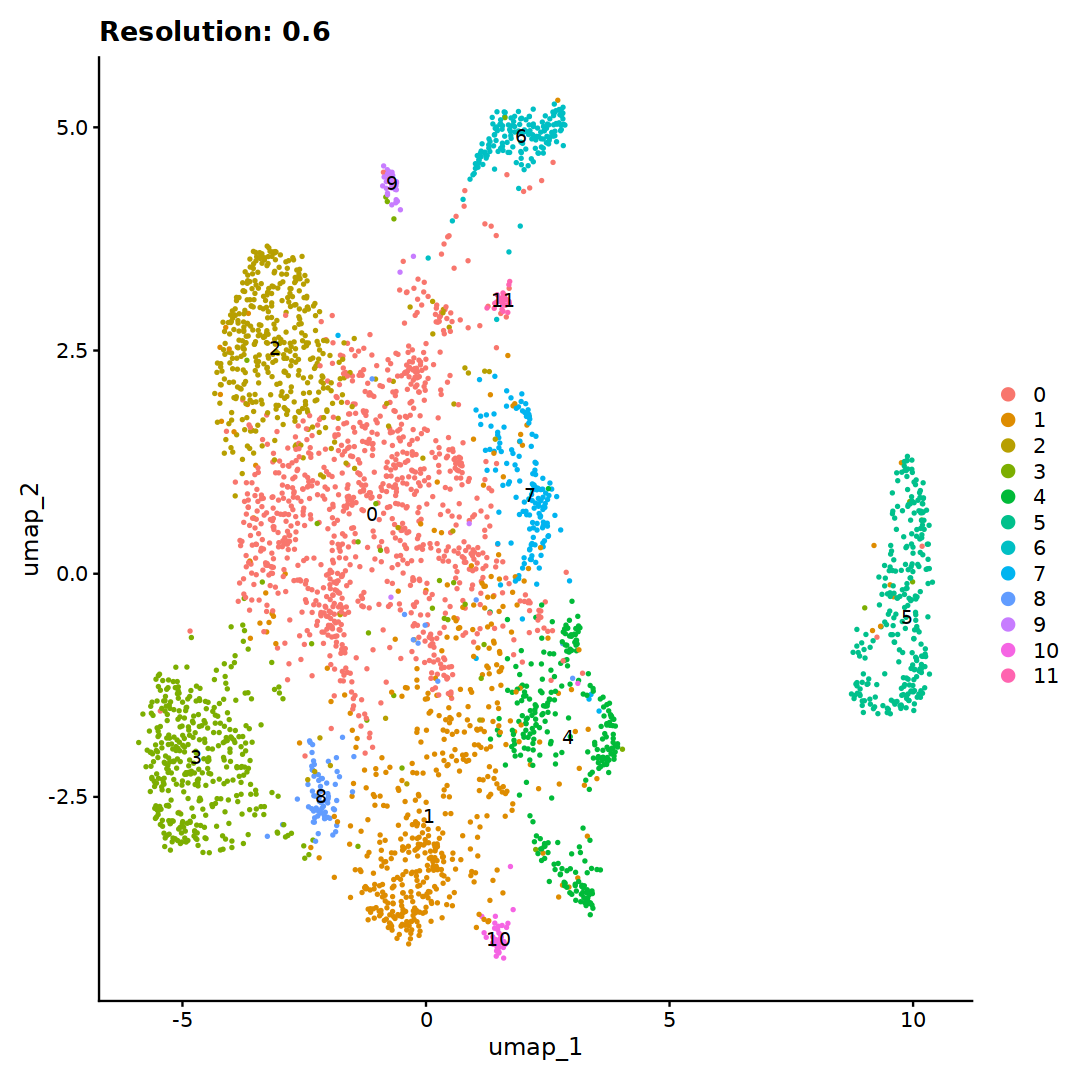

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7916
Number of communities: 15
Elapsed time: 0 seconds


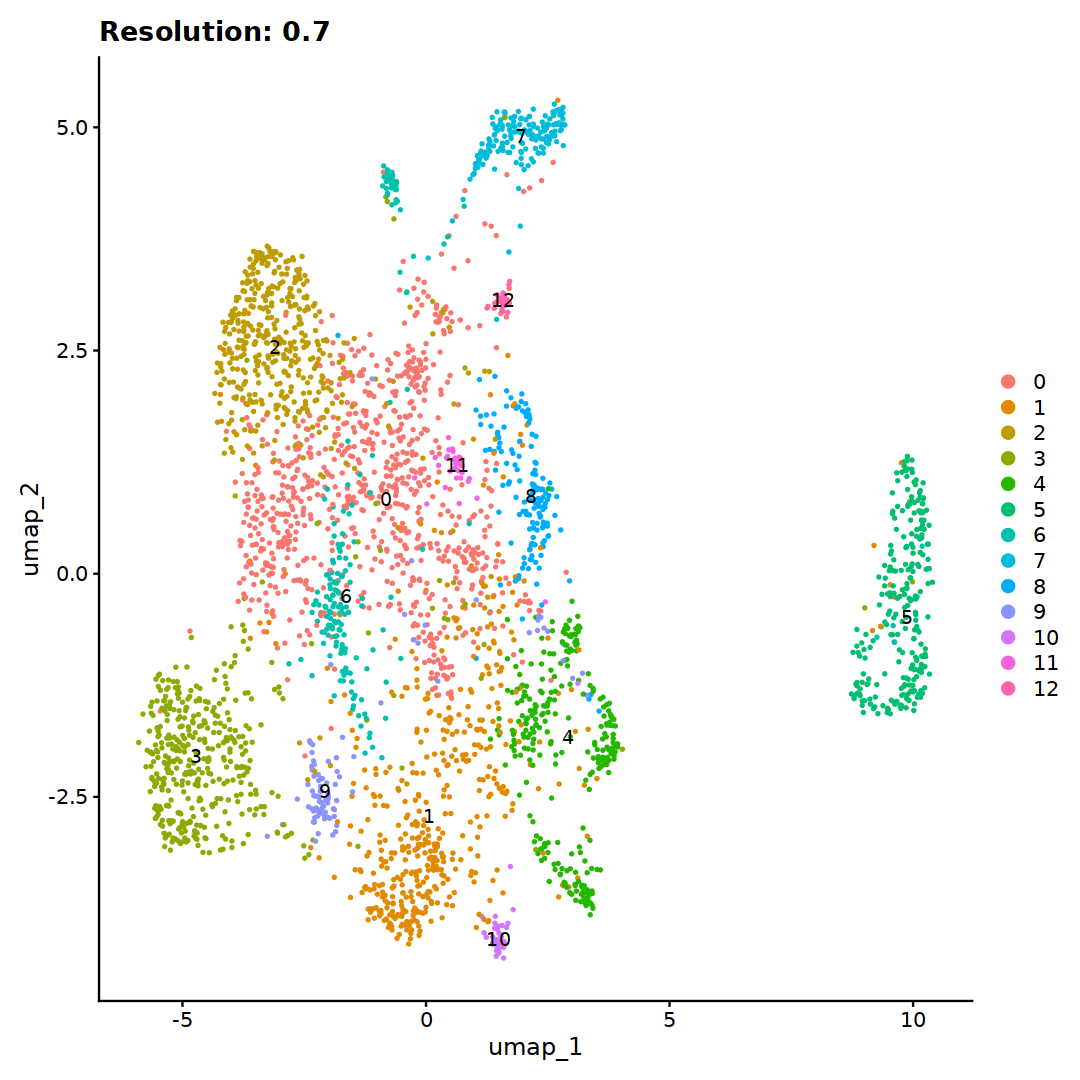

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7789
Number of communities: 15
Elapsed time: 0 seconds


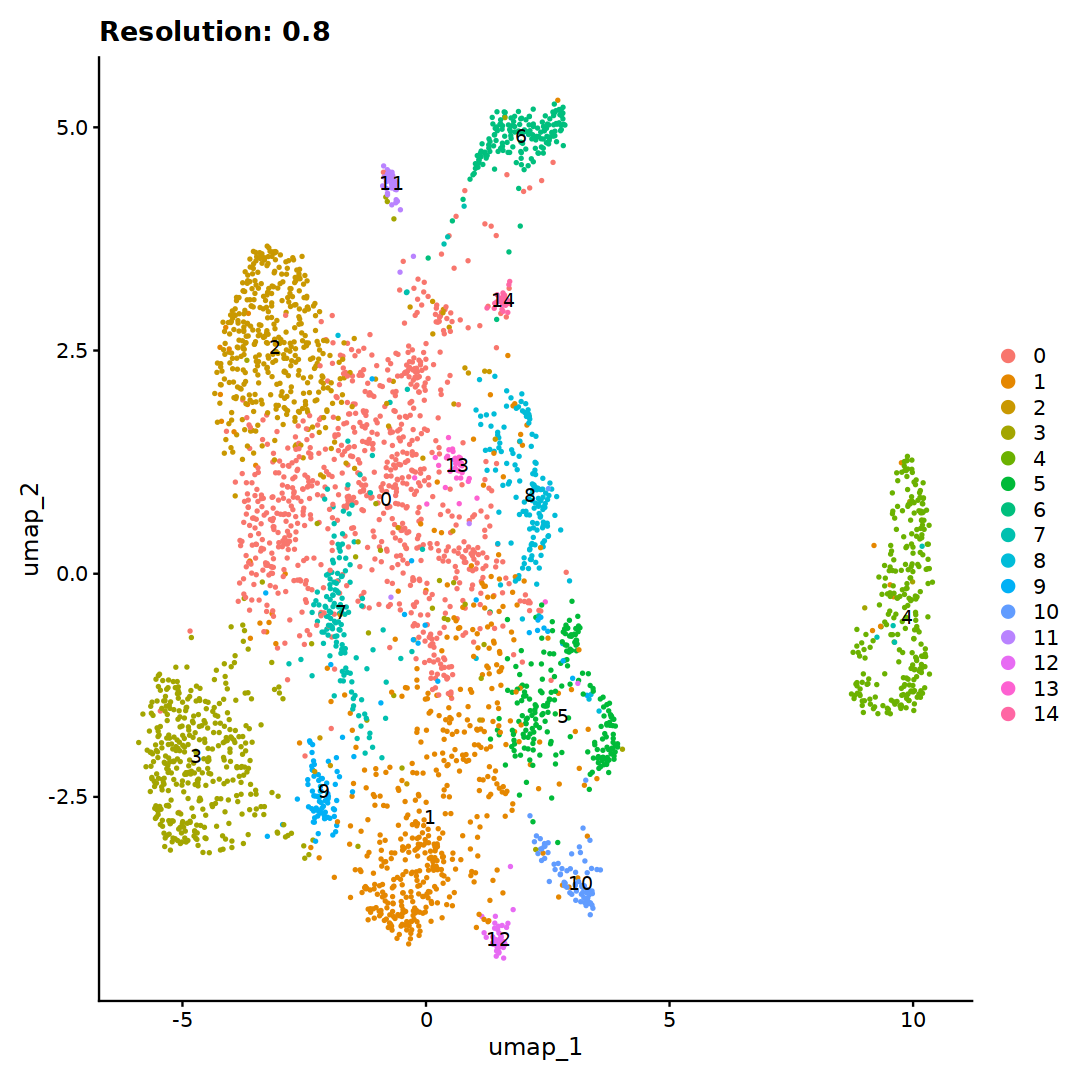

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7671
Number of communities: 16
Elapsed time: 0 seconds


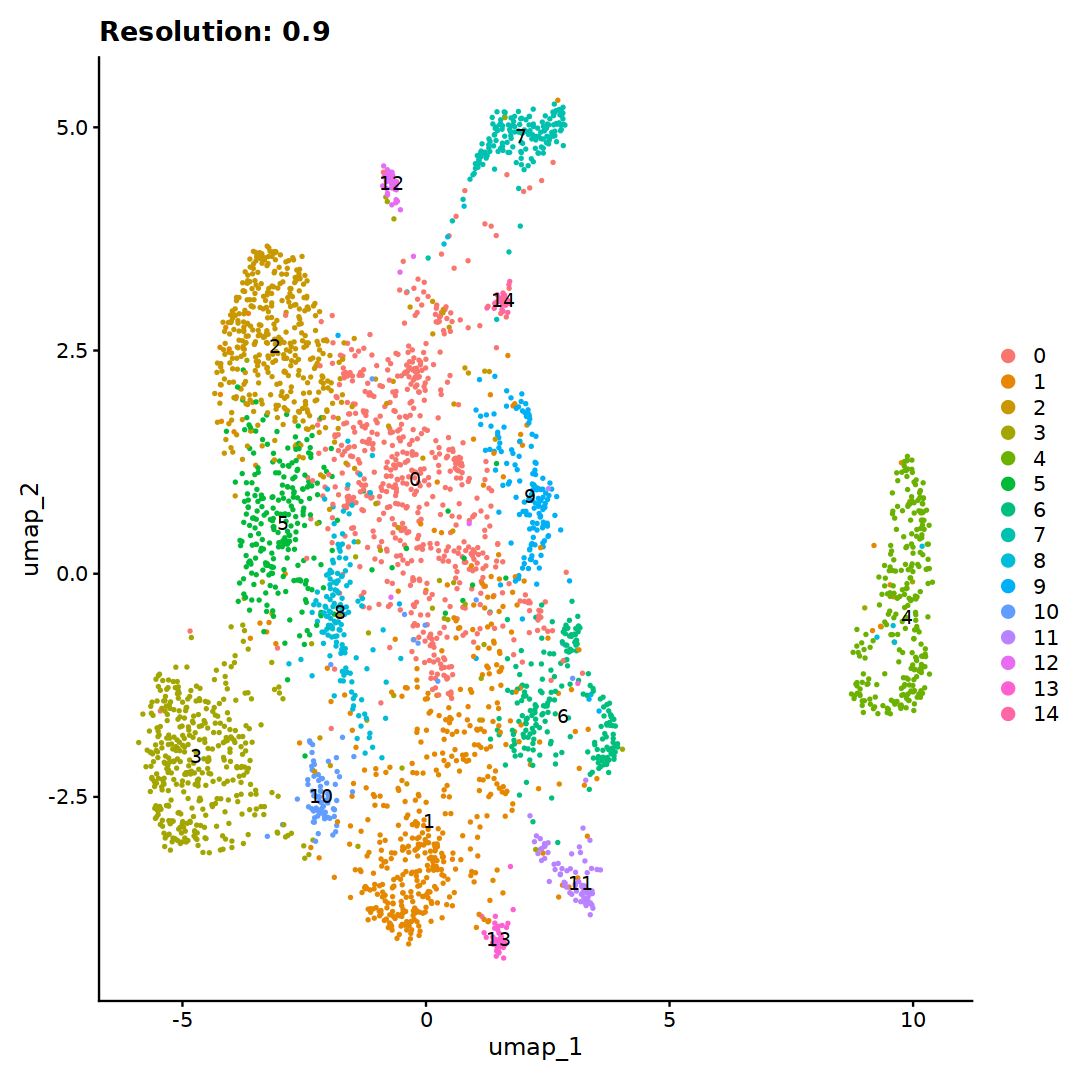

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7553
Number of communities: 16
Elapsed time: 0 seconds


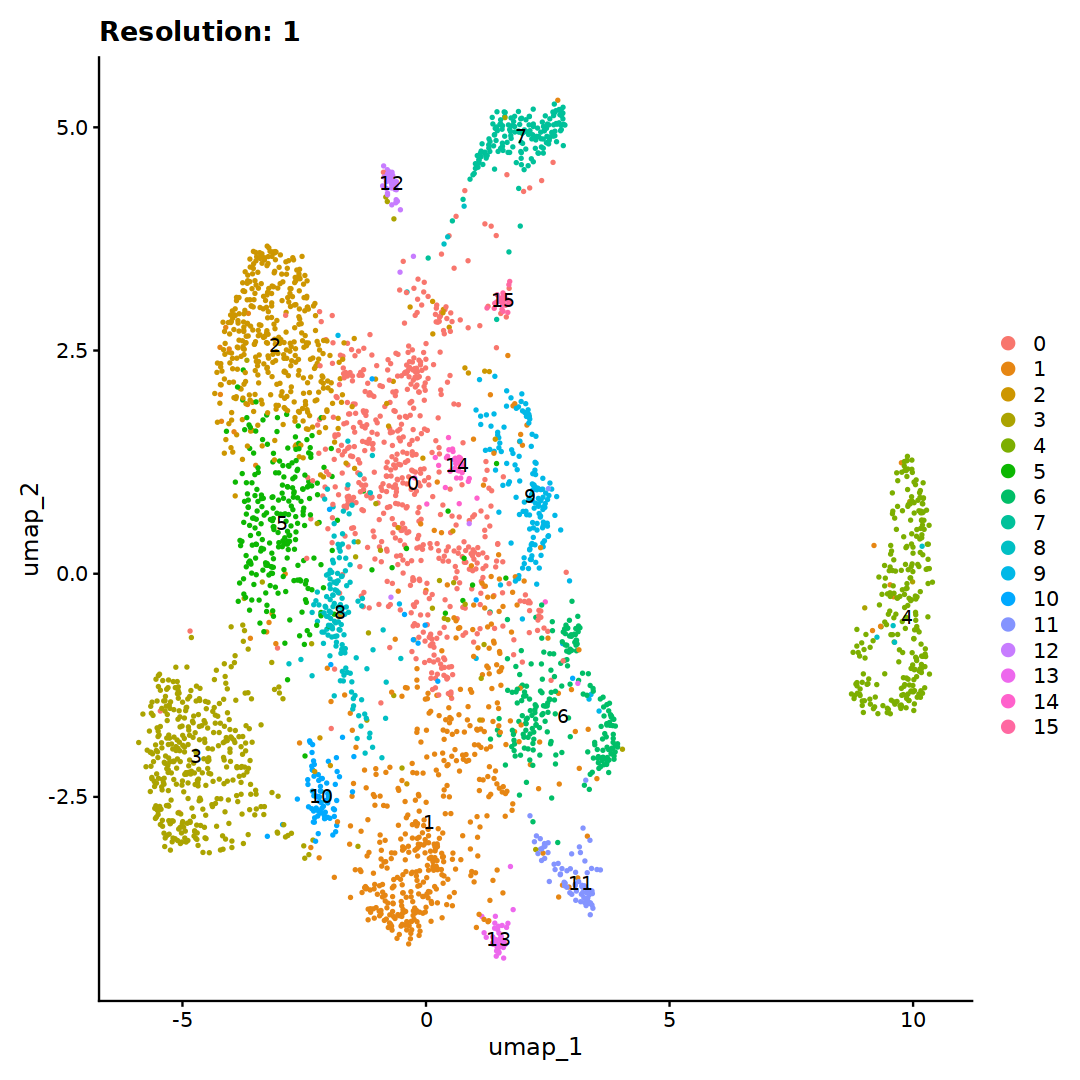

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7448
Number of communities: 17
Elapsed time: 0 seconds


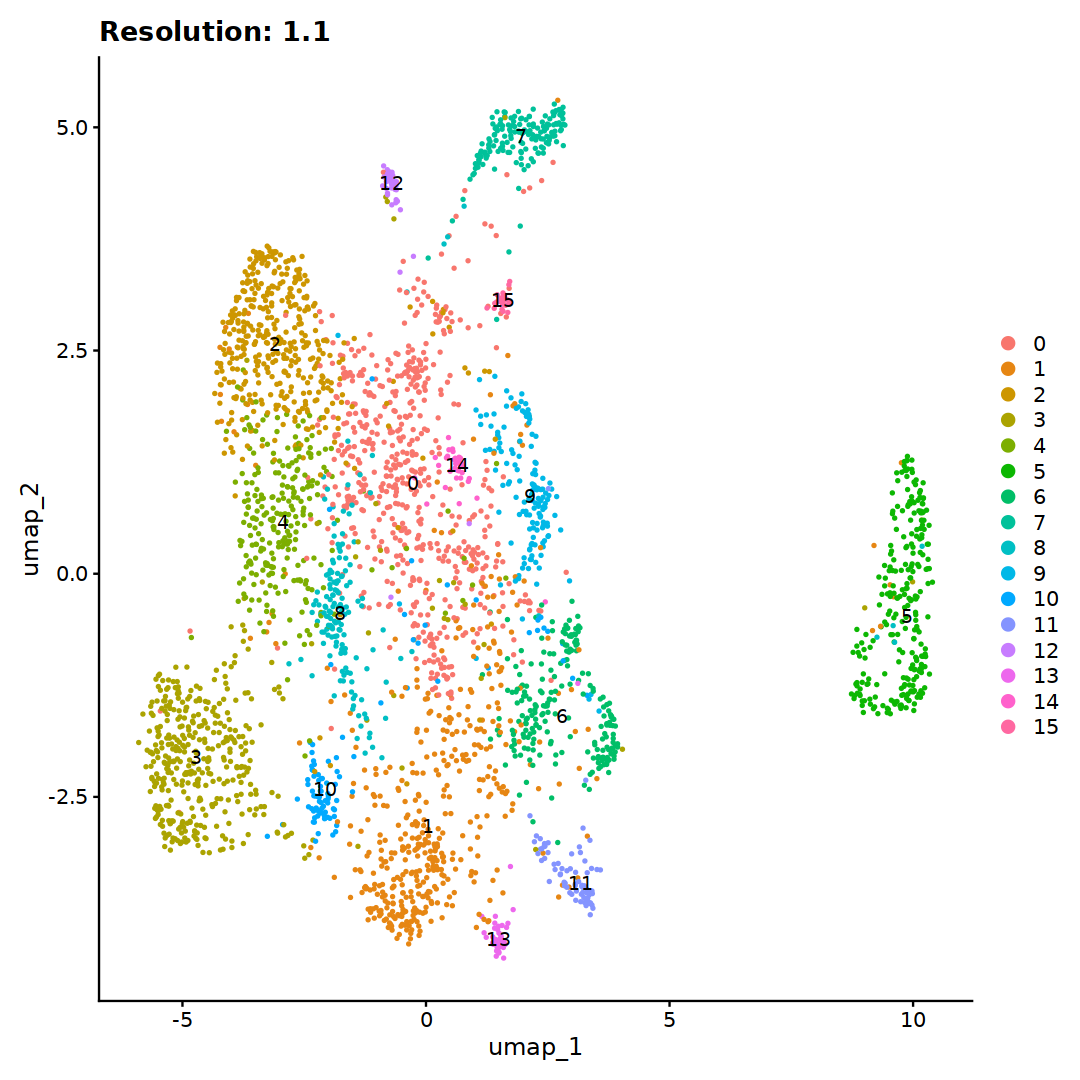

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7345
Number of communities: 18
Elapsed time: 1 seconds


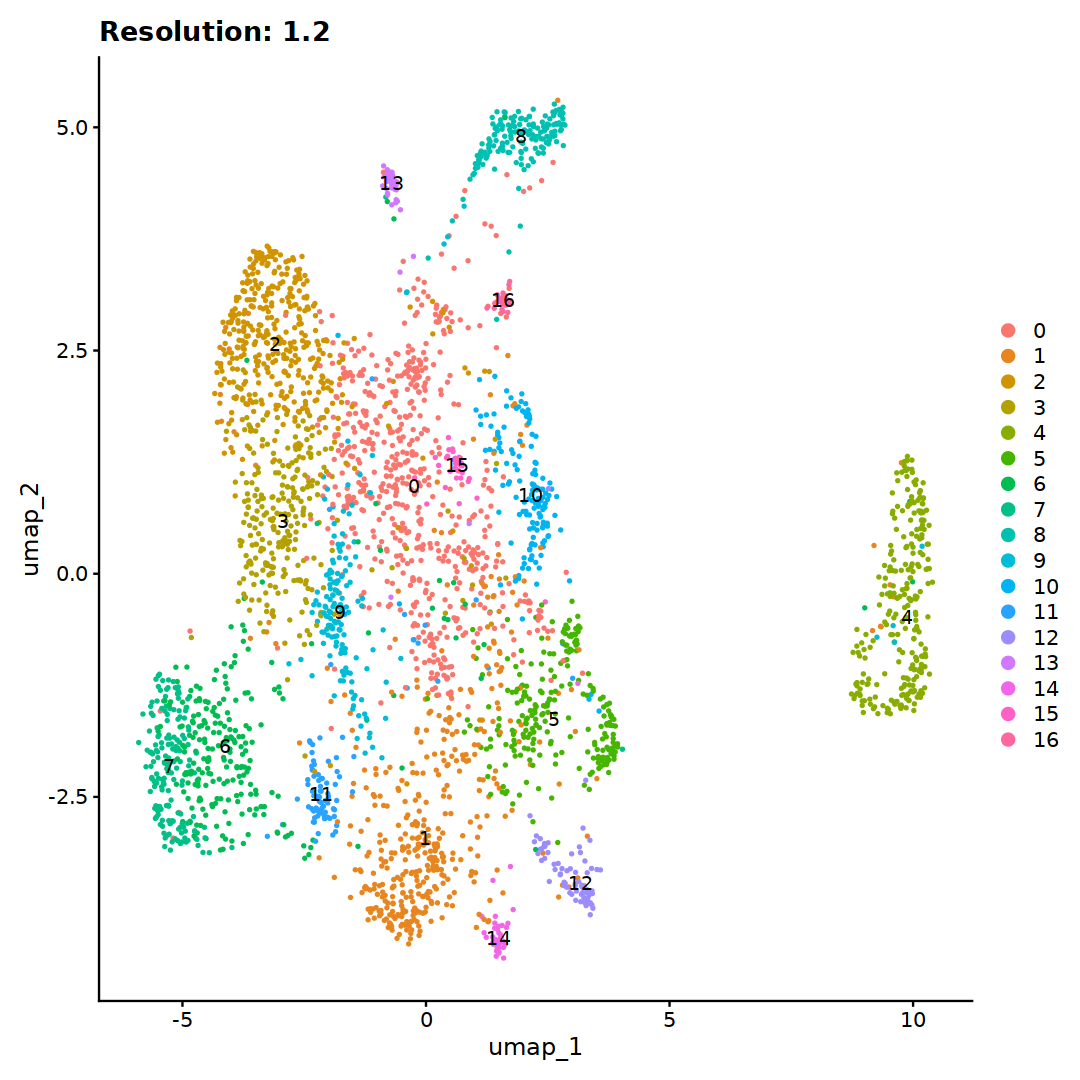

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7248
Number of communities: 18
Elapsed time: 0 seconds


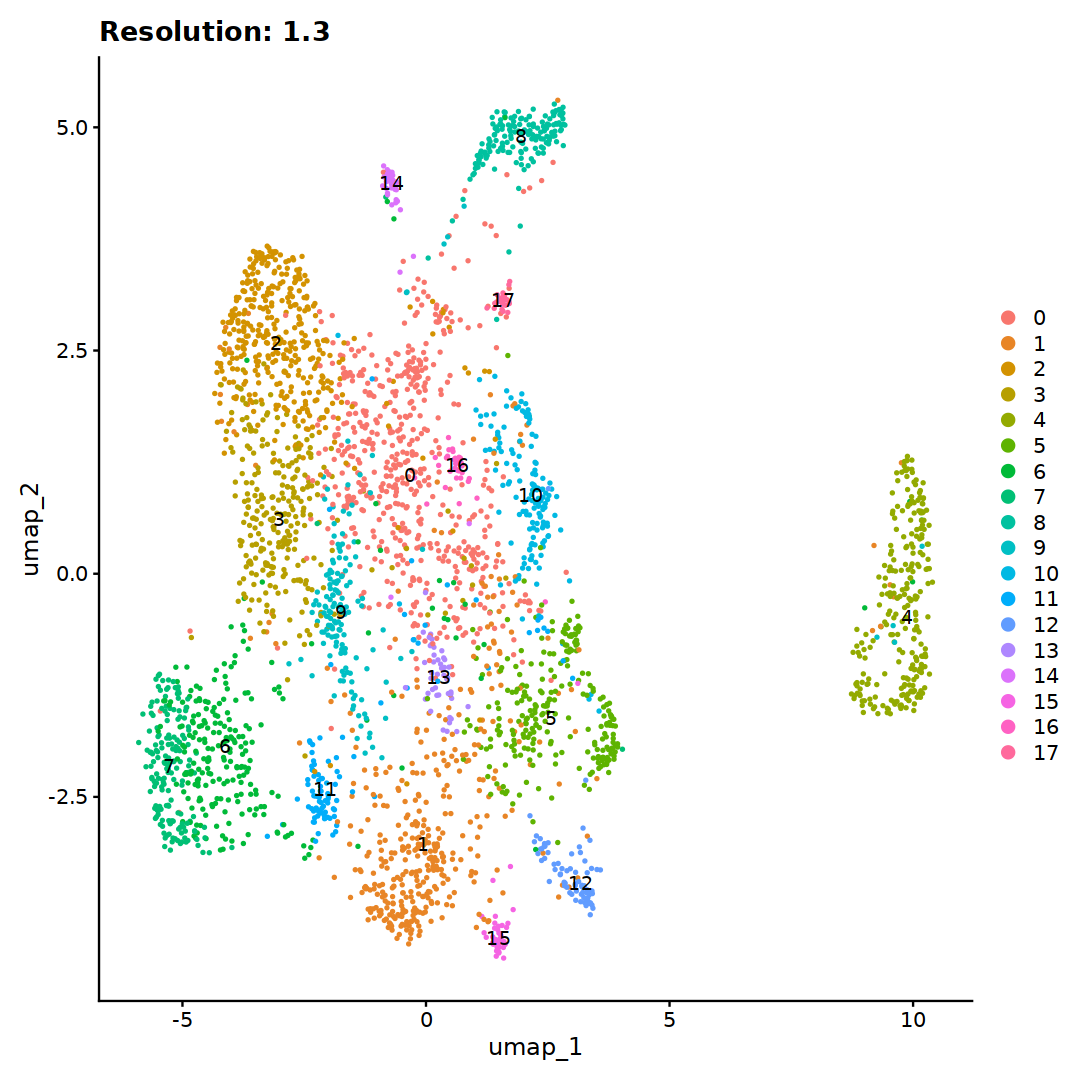

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7149
Number of communities: 18
Elapsed time: 0 seconds


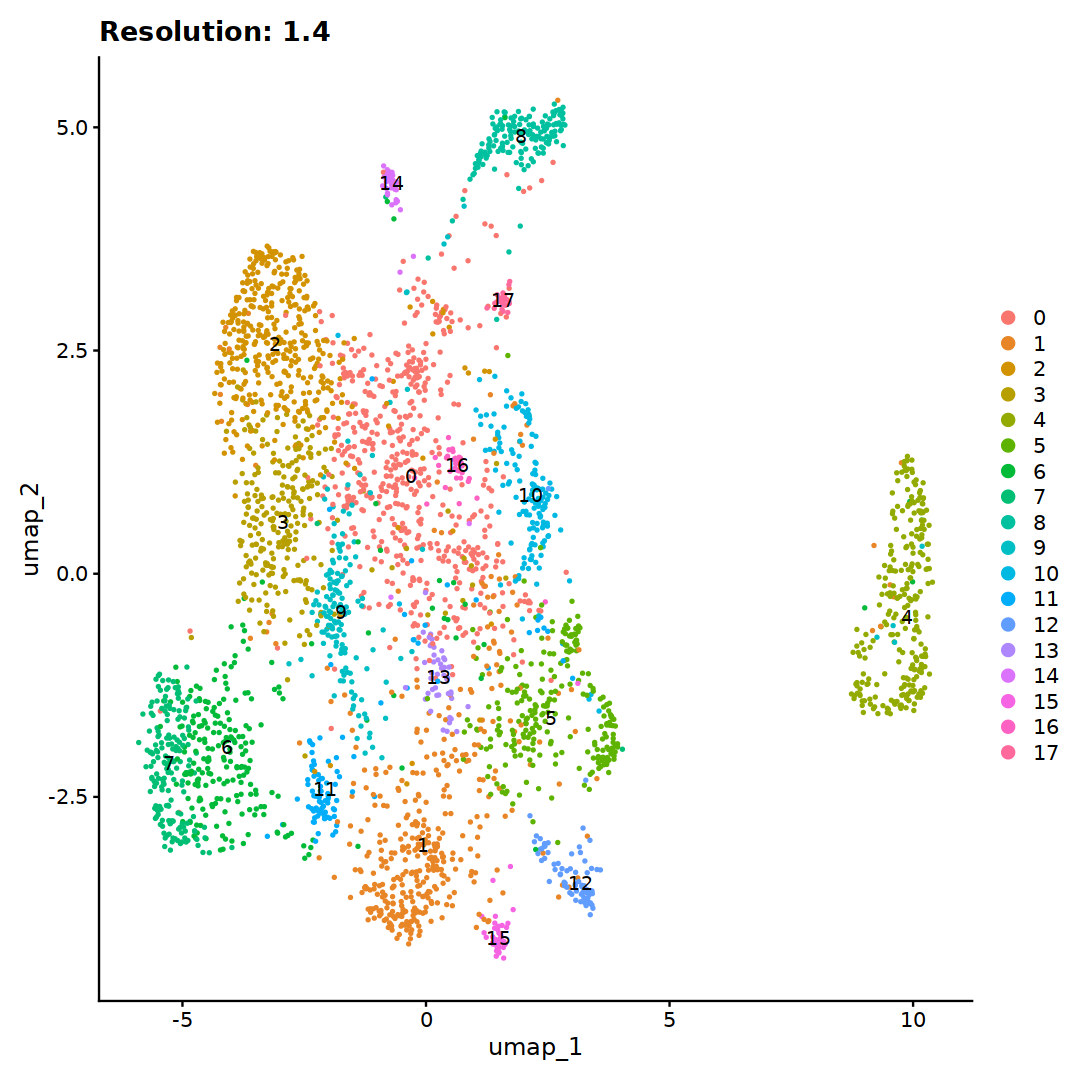

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7051
Number of communities: 18
Elapsed time: 0 seconds


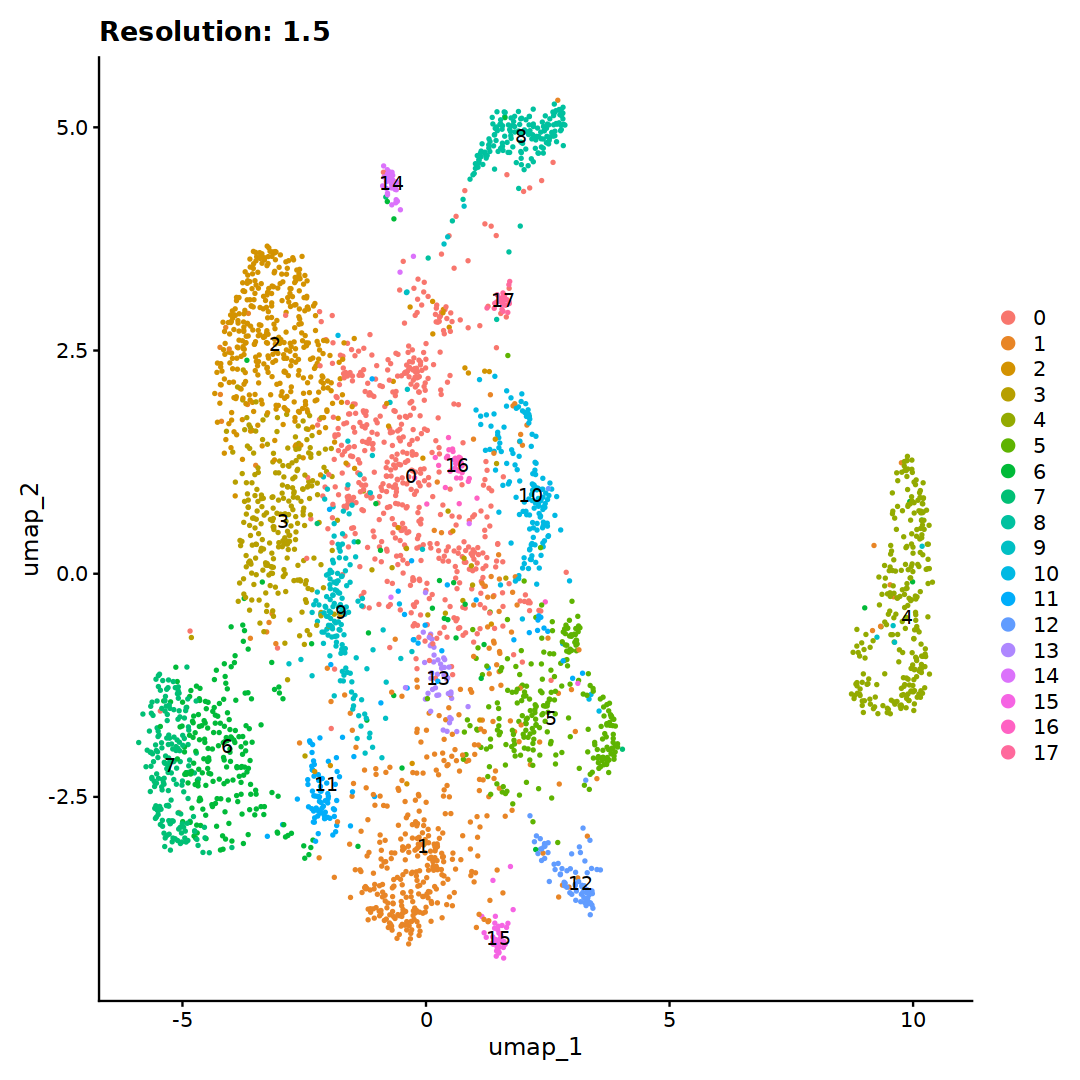

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6955
Number of communities: 17
Elapsed time: 0 seconds


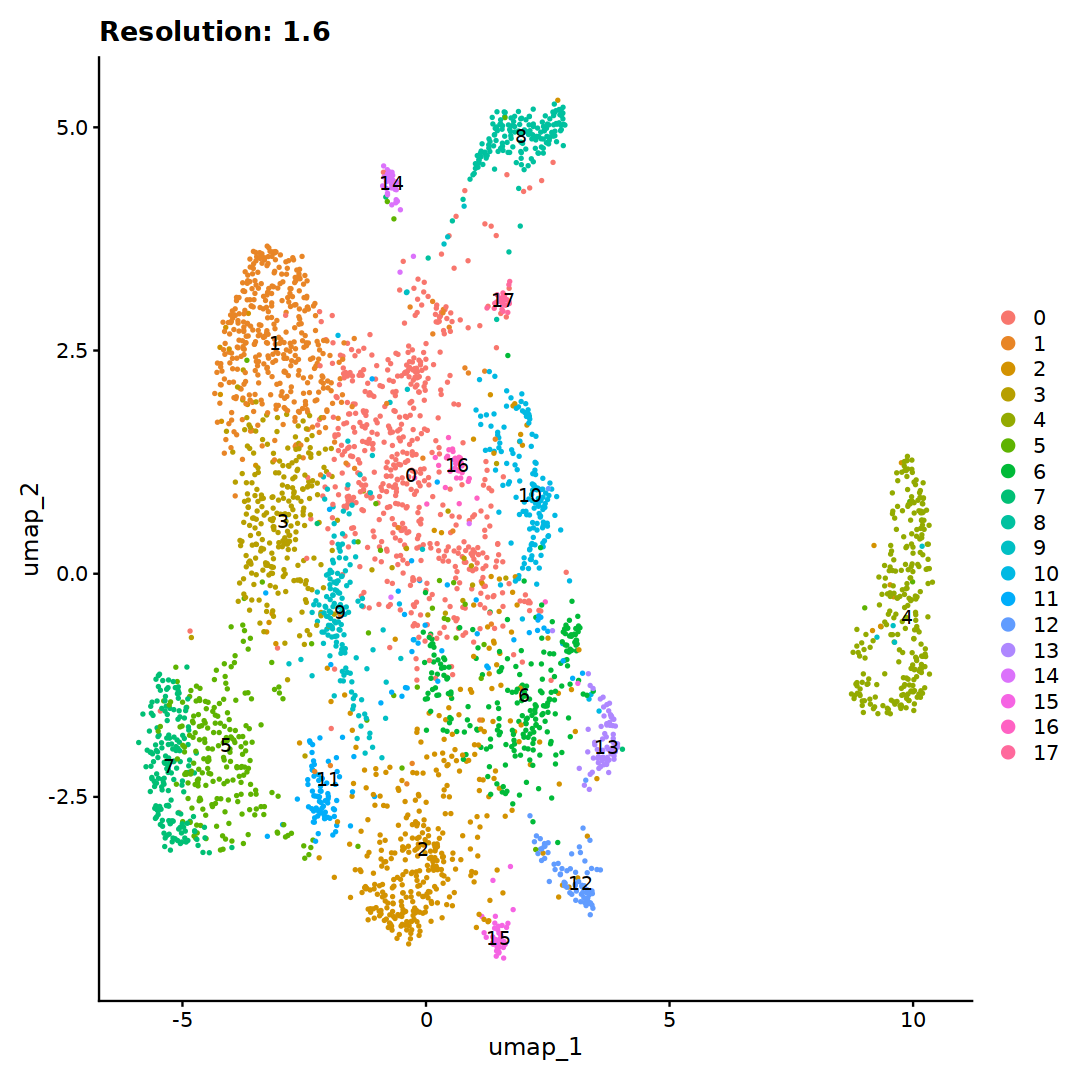

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6861
Number of communities: 18
Elapsed time: 0 seconds


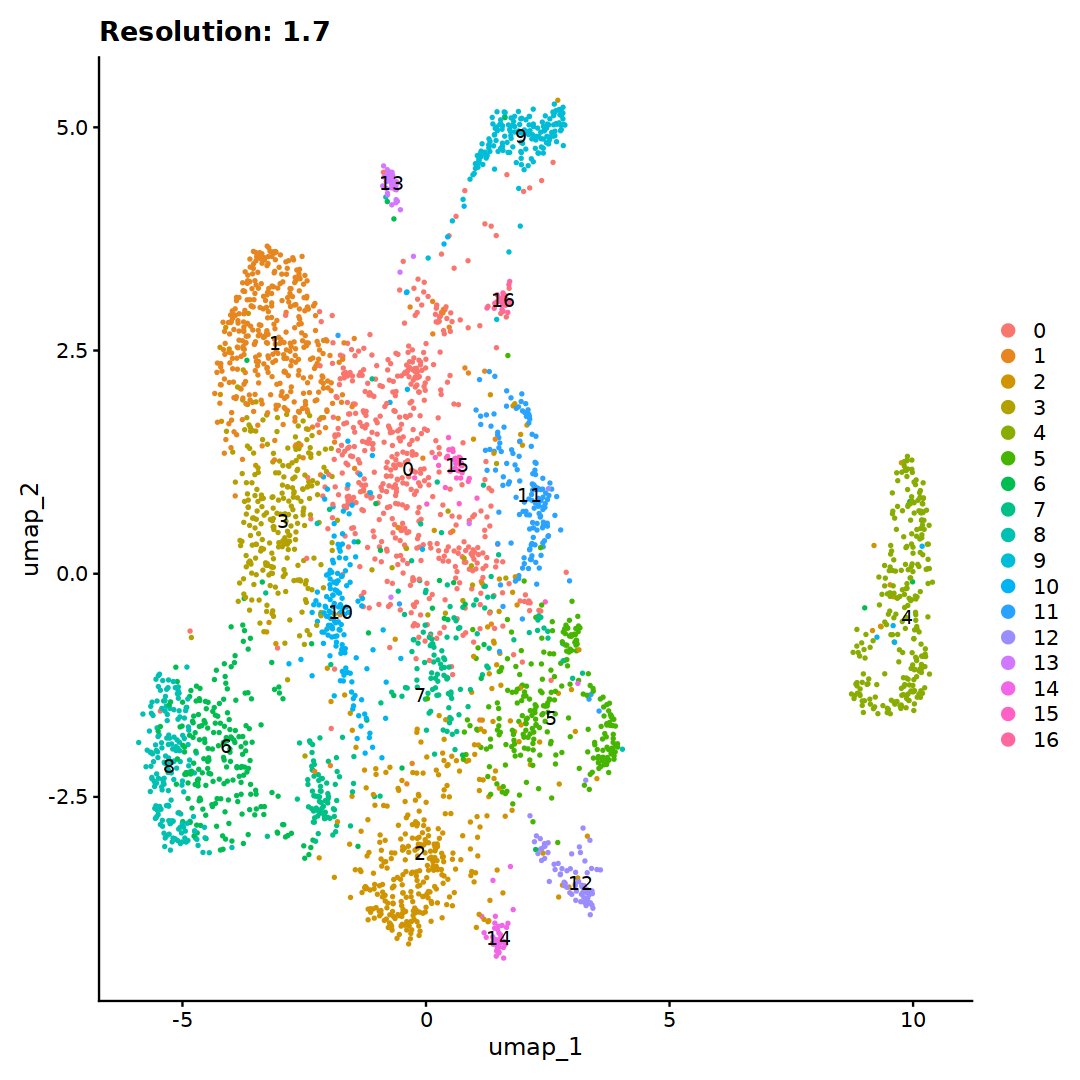

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6767
Number of communities: 19
Elapsed time: 0 seconds


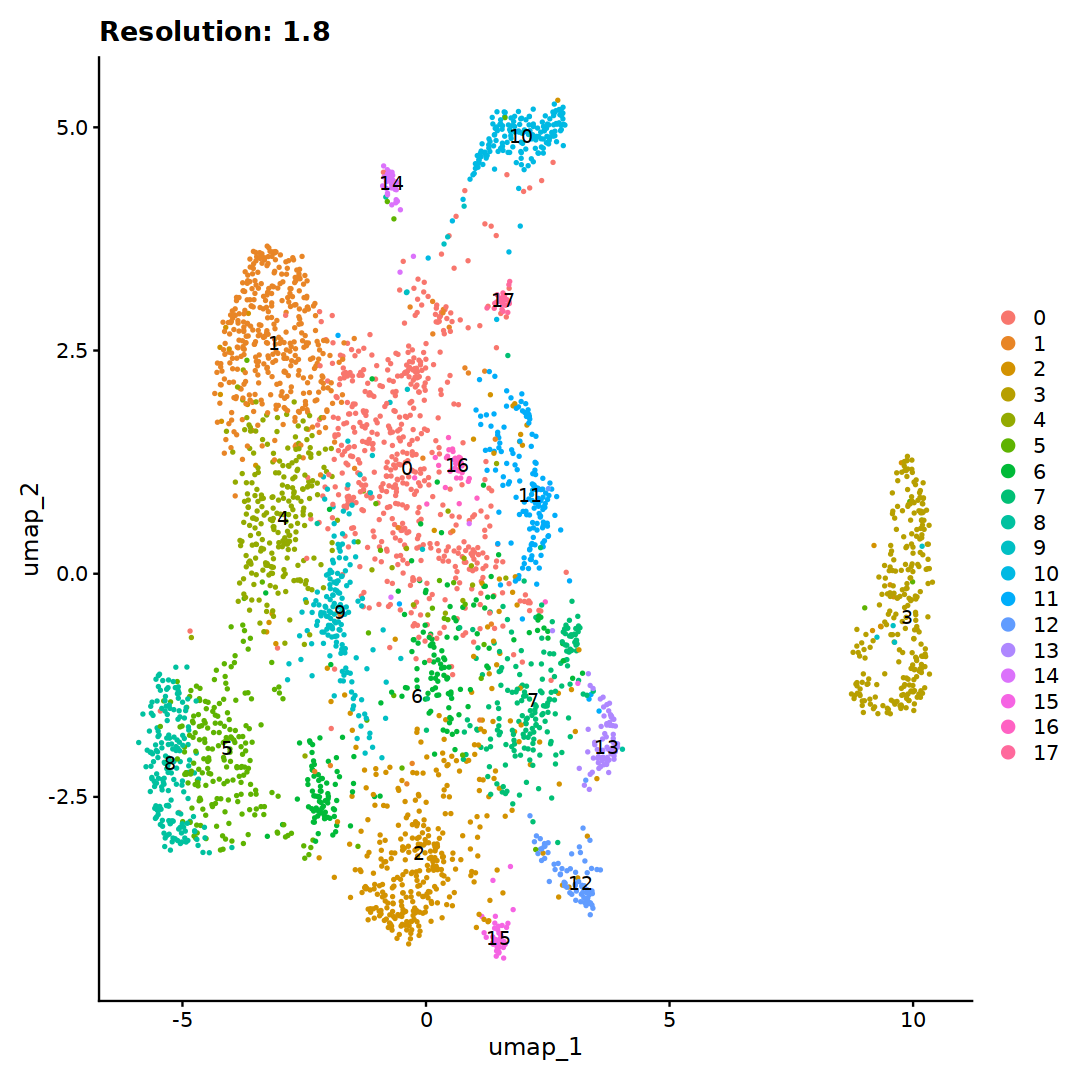

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3374
Number of edges: 177552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6673
Number of communities: 20
Elapsed time: 0 seconds


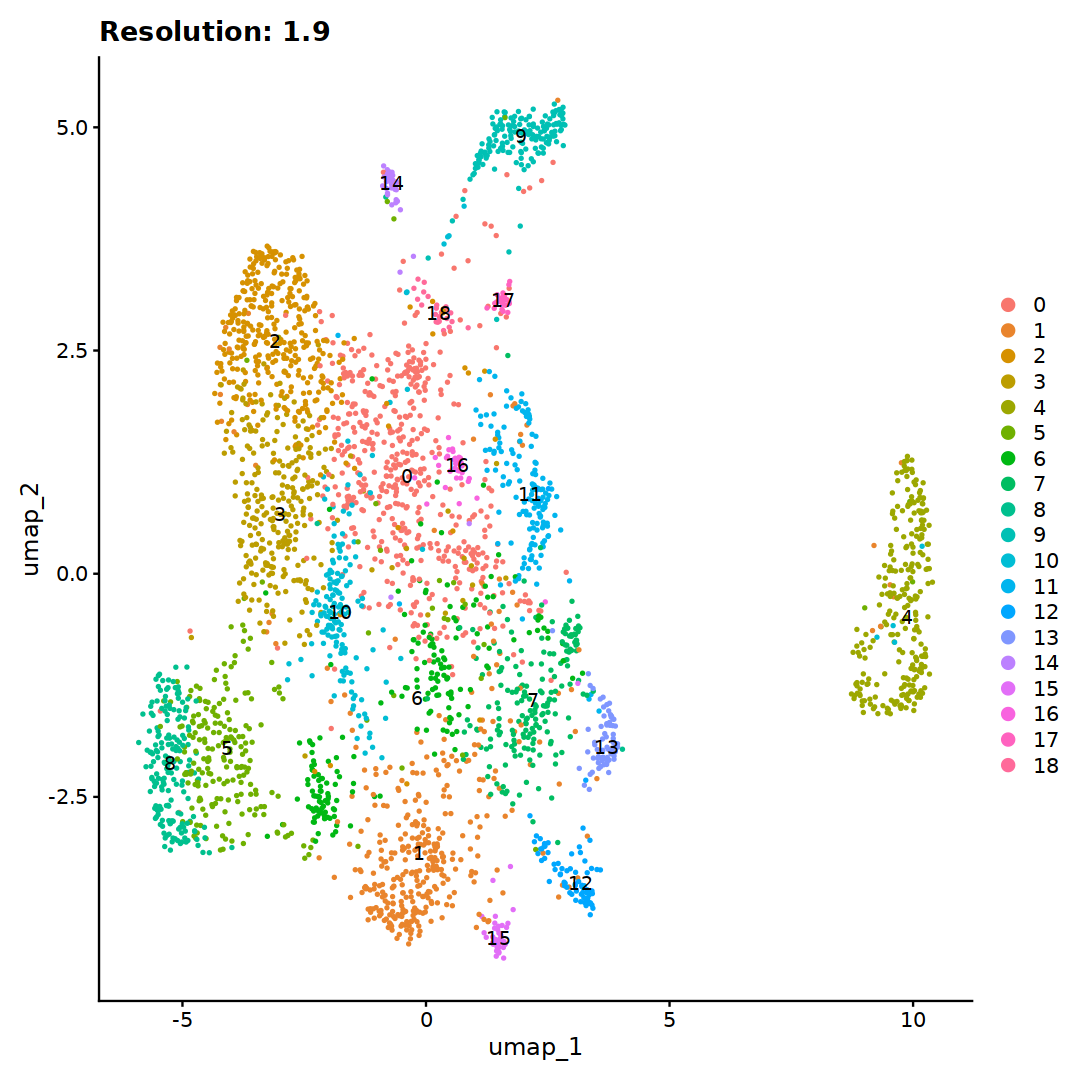

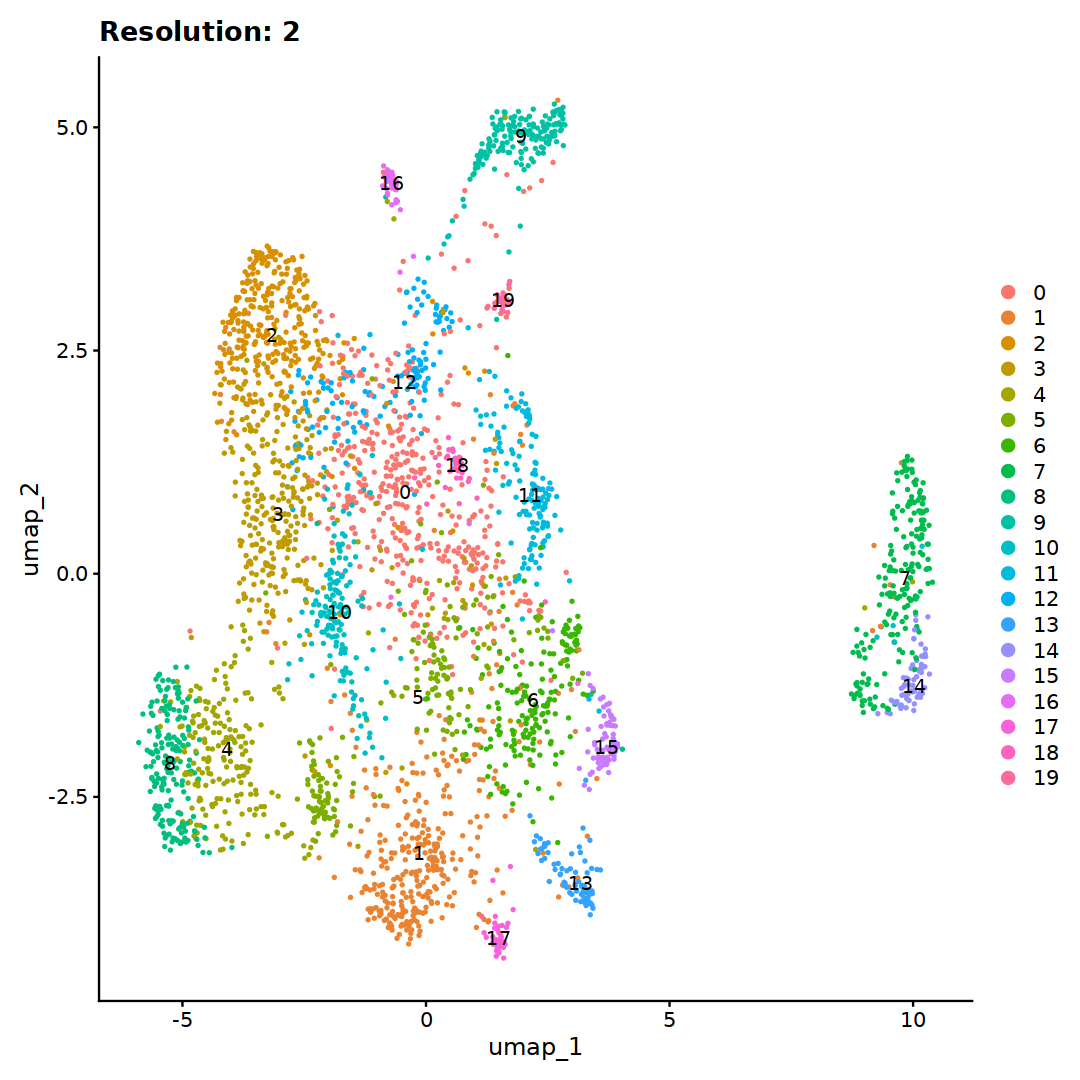

In [14]:
library(Seurat)
library(clustree)
library(dplyr)

# UMAP
Cere_GABA <- RunUMAP(Cere_GABA, dims = 1:40, verbose = TRUE)

cluster_results <- list()

# re-cluster
for (i in c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0)) {
  Cere_GABA <- FindClusters(Cere_GABA, resolution = i)
  res_col_name <- paste0("integrated_snn_res.", i)
  new_col_name <- paste0("GABA_", res_col_name)
  colnames(Cere_GABA@meta.data)[colnames(Cere_GABA@meta.data) == res_col_name] <- new_col_name
  
  cluster_results[[paste0("resolution_", i)]] <- Cere_GABA
  
  plot <- DimPlot(Cere_GABA, reduction = "umap", label = TRUE) + 
    labs(title = paste0("Resolution: ", i))
  print(plot)
}

In [15]:
saveRDS(Cere_GABA, file = '/data/work/5months_Cere/GABA/10_budgerigar_brain_5months_Cere_GABA_unannotated.rds')